In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('Dataset_Day13.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


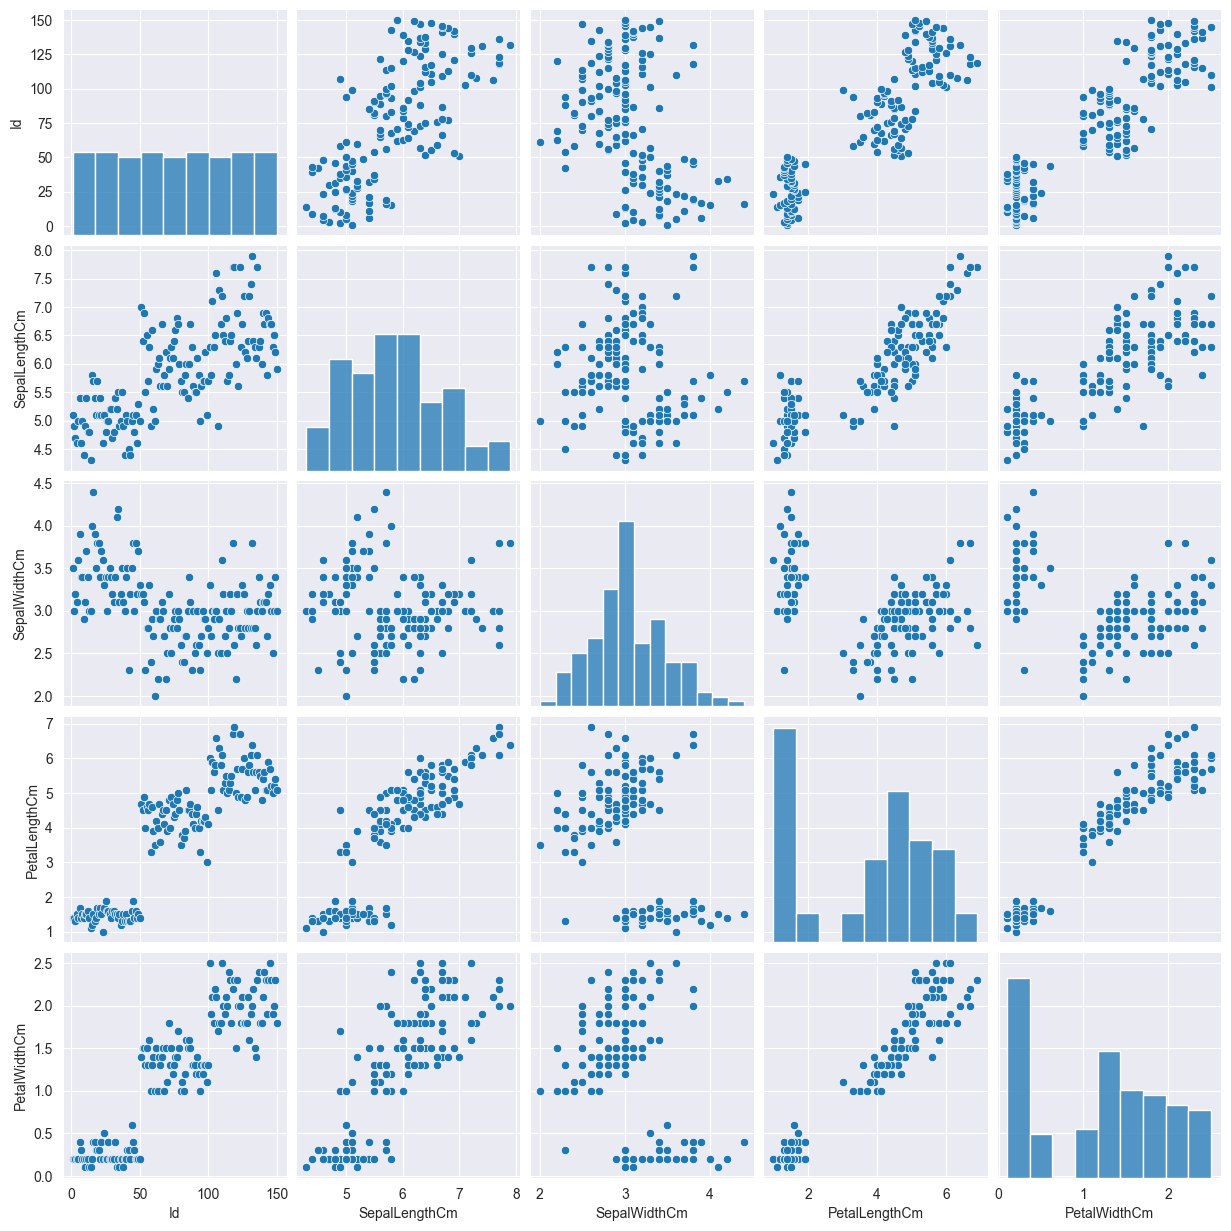

In [8]:
sns.pairplot(df)

In [9]:
# 1.	Firstly, treat all outliers and missing values in the dataset.

df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# So no Null value then no remove 
# After that we remove Outliers
Q1 = df.iloc[:, 1:5].quantile(0.25)
Q3 = df.iloc[:, 1:5].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df.iloc[:, 1:5] < (Q1 - 1.5 * IQR)) | (df.iloc[:, 1:5] > (Q3 + 1.5 * IQR))).any(axis=1)]

len(df)

146

In [14]:
# 2.	Complete all basic data descriptive statistics by Species

grouped_data = df.groupby('Species')


In [16]:
for species, group in grouped_data:
    print("Species:", species)
    print("Mean:")
    print(group.describe().loc['mean'])
    print("Standard Deviation:")
    print(group.describe().loc['std'])
    print("Minimum:")
    print(group.describe().loc['min'])
    print("Maximum:")
    print(group.describe().loc['max'])
    print("Median:")
    print(group.describe().loc['50%'])
    print("Count:")
    print(group.describe().loc['count'])
    print("\n")


Species: Iris-setosa
Mean:
Id               25.361702
SepalLengthCm     4.976596
SepalWidthCm      3.365957
PetalLengthCm     1.463830
PetalWidthCm      0.244681
Name: mean, dtype: float64
Standard Deviation:
Id               14.885688
SepalLengthCm     0.338932
SepalWidthCm      0.327890
PetalLengthCm     0.178673
PetalWidthCm      0.105930
Name: std, dtype: float64
Minimum:
Id               1.0
SepalLengthCm    4.3
SepalWidthCm     2.3
PetalLengthCm    1.0
PetalWidthCm     0.1
Name: min, dtype: float64
Maximum:
Id               50.0
SepalLengthCm     5.8
SepalWidthCm      4.0
PetalLengthCm     1.9
PetalWidthCm      0.6
Name: max, dtype: float64
Median:
Id               25.0
SepalLengthCm     5.0
SepalWidthCm      3.4
PetalLengthCm     1.5
PetalWidthCm      0.2
Name: 50%, dtype: float64
Count:
Id               47.0
SepalLengthCm    47.0
SepalWidthCm     47.0
PetalLengthCm    47.0
PetalWidthCm     47.0
Name: count, dtype: float64


Species: Iris-versicolor
Mean:
Id               75.795

In [17]:
# 3.	Use the Sepal Length , Sepal Width, Petal Length and Petal Width to find K-Means clusters.

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)


F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [20]:
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels
cluster_centers = kmeans.cluster_centers_

for i in range(k):
    print("Cluster", i+1)
    print("Center coordinates:", cluster_centers[i])
    cluster_data = df[df['Cluster'] == i]
    print("Number of data points in cluster:", len(cluster_data))
    print("Sample data points:")
    print(cluster_data.head())
    print("\n")


Cluster 1
Center coordinates: [-1.0589749   0.83539793 -1.33842672 -1.28693388]
Number of data points in cluster: 47
Sample data points:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


Cluster 2
Center coordinates: [ 0.50274566 -0.39660306  0.6354147   0.61096861]
Number of data points in cluster: 99
Sample data points:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
50  51            7.0           3.2            4.7           1.4   
51  52            6.4        

F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: 

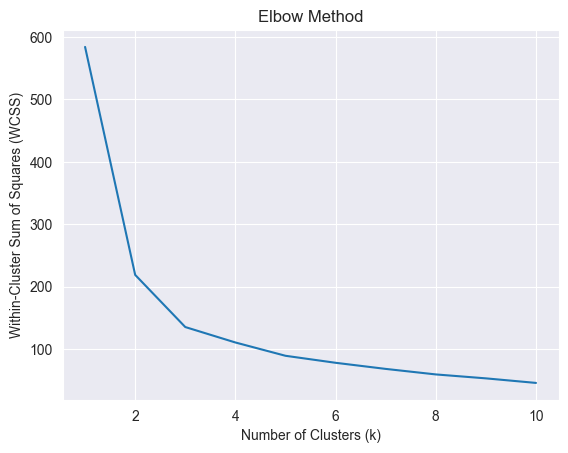

In [21]:
# 4.	Find the optimum cluster number based on, elbow method, silhouette method and Calinski Harabasz Score.


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
max_clusters = 10

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()


F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: 

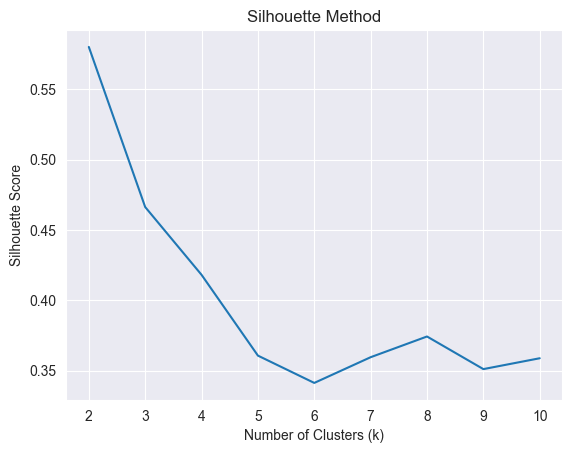

In [22]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=1233)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


plt.plot(range(2, max_clusters + 1), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: 

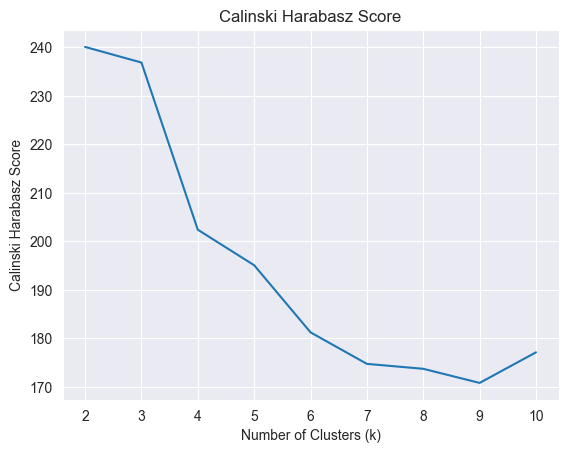

In [23]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=1233)
    kmeans.fit(X_scaled)
    ch_scores.append(calinski_harabasz_score(X_scaled, kmeans.labels_))

plt.plot(range(2, max_clusters + 1), ch_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski Harabasz Score')
plt.title('Calinski Harabasz Score')
plt.show()


In [24]:
# 5.	Tabulate the proportion of each Species among the clusters found as a result of evaluation in task 4.

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=1233)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_
species = df['Species']

cross_tab = pd.crosstab(cluster_labels, species)
cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=0), axis=1)

cross_tab

F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
0,0,49,50
1,47,0,0
